# data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

In [2]:
#loading data
datatrain = loadmat('train_32x32.mat')
datatest = loadmat('test_32x32.mat')
X_train = datatrain['X']
y_train = datatrain['y']
X_test = datatest['X']
y_test = datatest['y']

#making first dimension number of images
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

#print dataset shape
print("Training data: ", X_train.shape, y_train.shape)
print("test data: ", X_test.shape, y_train.shape)


Training data:  (73257, 32, 32, 3) (73257,)
test data:  (26032, 32, 32, 3) (73257,)


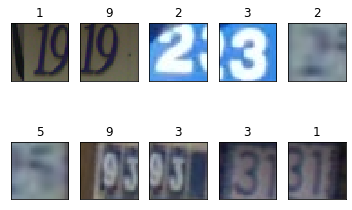

In [3]:
#plot random training images
figures, axes = plt.subplots(2,5)
for i,ax in enumerate(axes.flat):
    if X_train[i].shape == (32,32,3):
        ax.imshow(X_train[i])
    else:
        a.imshow(X_train[i,:,:,0])
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(y_train[i])

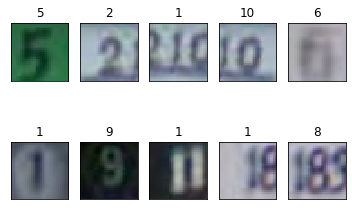

In [4]:
#plot random testing images
figures, axes = plt.subplots(2,5)
for i,ax in enumerate(axes.flat):
    if X_test[i].shape == (32,32,3):
        ax.imshow(X_test[i])
    else:
        a.imshow(X_test[i,:,:,0])
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(y_test[i])

In [ ]:
#Convert label 10 to 0
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

#splitting training data into training + validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.13, random_state = 7) 


In [20]:
#using grayscale conversion to make training faster
def rbg2grey(img):
    return np.expand_dims(np.dot(img, [0.2990, 0.5870, 0.1140]), axis = 3)

grey_train = rbg2grey(X_train).astype(np.float32)
grey_test = rbg2grey(X_test).astype(np.float32)
grey_val = rbg2grey(X_val).astype(np.float32)

print("Training data: ", grey_train.shape)
print("Testing data: ", grey_test.shape)
print("Validation data: ", grey_val.shape)


Training data:  (63733, 32, 32, 1)
Testing data:  (26032, 32, 32, 1)
Validation data:  (9524, 32, 32, 1)


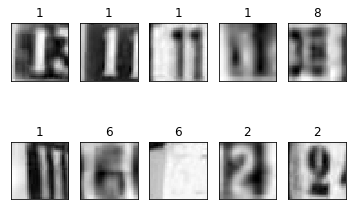

In [21]:
#plot random training images
figures, axes = plt.subplots(2,5)
for i,ax in enumerate(axes.flat):
    if grey_train[i].shape == (32,32,3):
        ax.imshow(grey_train[i],cmap='gray')
    else:
        ax.imshow(grey_train[i,:,:,0], cmap = 'gray')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(y_train[i])

In [22]:
#normalization
train_mean = np.mean(grey_train, axis = 0)
train_sd = np.std(grey_train, axis = 0)

grey_train_norm = (grey_train - train_mean)/train_sd
grey_test_norm = (grey_test - train_mean)/train_sd
grey_val_norm = (grey_val - train_mean)/train_sd

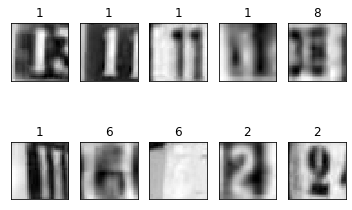

In [24]:
#plot random normalized greyscale training images
figures, axes = plt.subplots(2,5)
for i,ax in enumerate(axes.flat):
    if grey_train_norm[i].shape == (32,32,3):
        ax.imshow(grey_train_norm[i],cmap='gray')
    else:
        ax.imshow(grey_train_norm[i,:,:,0], cmap = 'gray')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(y_train[i])

In [25]:
#one hot encoding y
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(y_train.reshape(-1,1))

y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Validation set", y_val.shape)
print("Test set", y_test.shape)

Training set (63733, 10)
Validation set (9524, 10)
Test set (26032, 10)


C:\Users\anany\Anaconda3\envs\envTF113\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
#save preprocessed data
import h5py

h5f = h5py.File('SVHN_grey_norm_ttv.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=grey_train_norm)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=grey_test_norm)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=grey_val_norm)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()